In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
accident_data=pd.read_csv("/traffic/traffic_accident_data.csv",encoding="utf-8")
#加载数据和相关包

In [2]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体  
  
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

In [3]:
accident_data.isnull().any()
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56651 entries, 0 to 56650
Data columns (total 21 columns):
﻿accidenttime            56651 non-null object
accidentaddr             56651 non-null object
driver1fault             56651 non-null object
driver1responsibility    56651 non-null object
driver2responsibility    56651 non-null object
sex1                     56651 non-null int64
platenumber1             56651 non-null object
carcolor1                56650 non-null object
sex2                     56651 non-null int64
platenumber2             56651 non-null object
carcolor2                56651 non-null object
jxmc1                    56651 non-null object
jxmc2                    56651 non-null object
cclzrq1                  56651 non-null object
cclzrq2                  56651 non-null object
clpp1                    56651 non-null object
clpp2                    56651 non-null object
driver1license           56651 non-null object
driver2license           56651 non-null object


查看数据相关信息

In [4]:
accident_data.rename(columns={accident_data.columns[0]:'accidenttime'},inplace=True)
#对accidenttime列名规范化

In [5]:
accident_time=pd.to_datetime(accident_data["accidenttime"])
accident_month=accident_time.dt.month
accident_quarter=accident_time.dt.quarter
accident_weekday_name=accident_time.dt.weekday_name
accident_weekday=accident_time.dt.weekday
accident_day=accident_time.dt.day
accident_hour=accident_time.dt.hour
accident_minute=accident_time.dt.minute

将事故发生时间列accidenttime转变为标准时间格式，并相应的提取发生月份，季度，星期，日期，小时和分信息

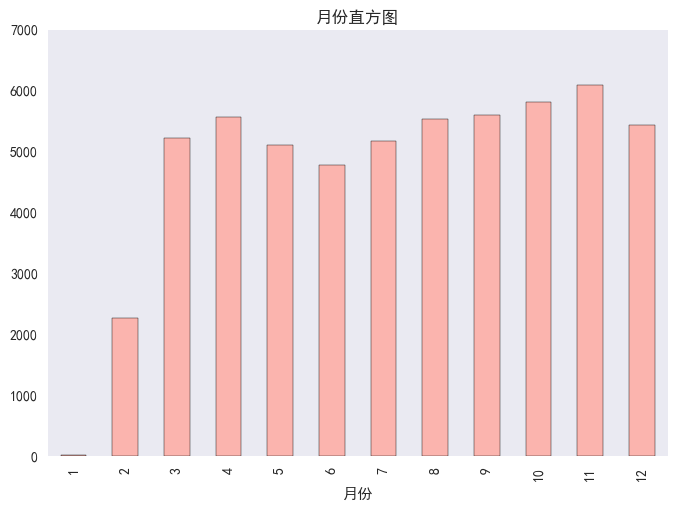

In [6]:
month_count=accident_month.value_counts(sort=False)
fig=plt.figure(facecolor="white")
month_count.plot(kind='bar',stacked=True, colormap= 'Pastel1',grid=False)
plt.title(u"月份直方图")
plt.xlabel("月份")
plt.show()
fig.savefig("month_hist.png")

绘出事故发生月份直方图，可以看到，除了一二月份，不知是过年的原因还是数据收集的问题，明显小于其他月份。而其他月份发生数目比较均衡，其中4月份到6月份有下降趋势，但进入暑假后，直到11月，事故发生数明显上升

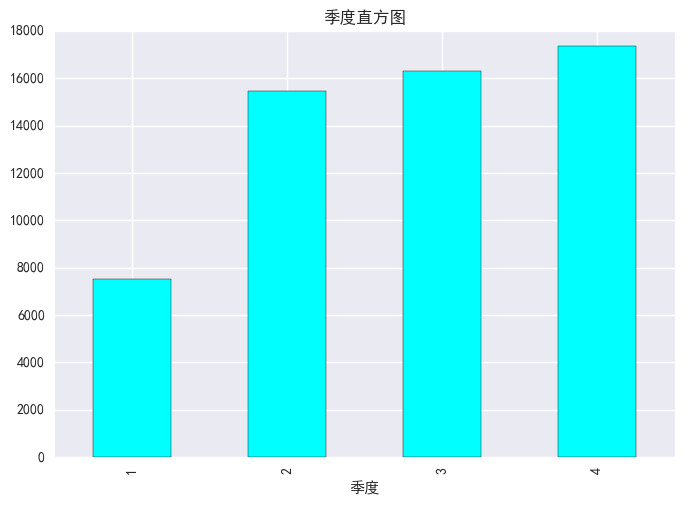

In [7]:
quarter_count=accident_quarter.value_counts(sort=False)
fig=plt.figure(facecolor="white")
quarter_count.plot(kind='Bar',color='cyan')
plt.title(u"季度直方图")
plt.xlabel("季度")
plt.show()
fig.savefig("quarter_hist.png")

通过季度直方图，可以明显看到事故发生数随着时间增长而增加，第四季度明显大于第一季度

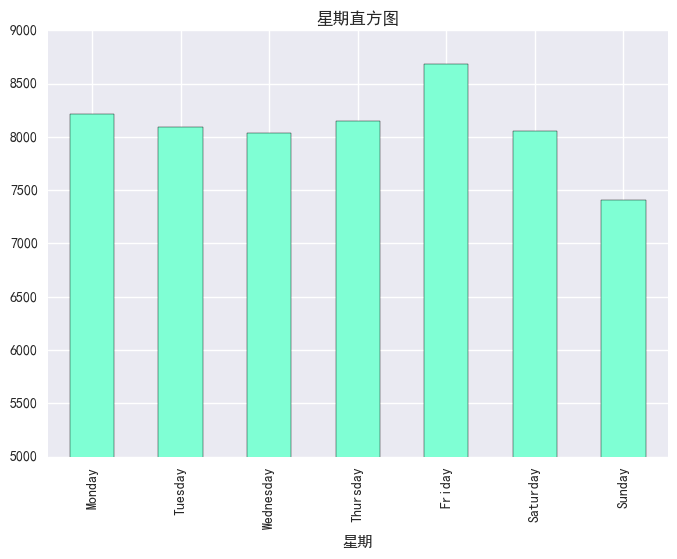

In [8]:
weekday_count=accident_weekday_name.value_counts(sort=True).\
    reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#print(weekday_count)
fig=plt.figure(facecolor="white")
plt.title(u"星期直方图")
plt.xlabel("星期")
weekday_count.plot(kind='Bar',color='aquamarine')
plt.ylim(5000)
plt.show()
fig.savefig("weekday_hist.png")

通过星期直方图可以看到，事故发生数比较平均，星期五发生事故的次数最多，即发生事故率的概率最大，反而周六周日的事故数明显小于工作日的，尤其是星期日

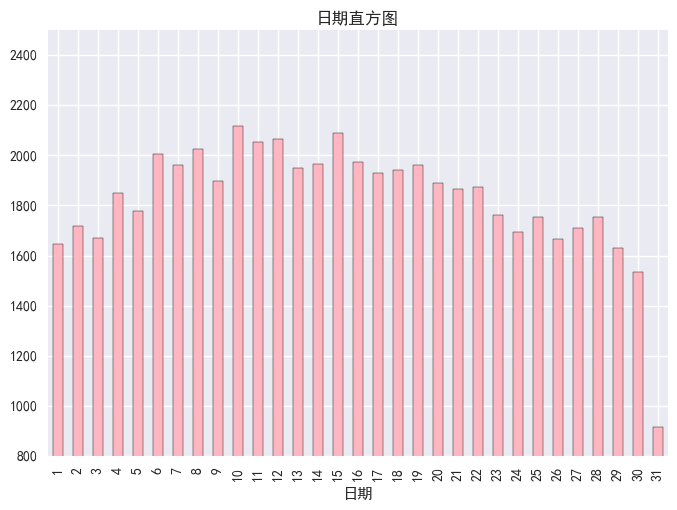

In [9]:
day_count=accident_day.value_counts(sort=True).reindex([i for i in range(1,32)])
fig=plt.figure(facecolor="white")
plt.title(u"日期直方图")
plt.xlabel("日期")
day_count.plot(kind='Bar',color='lightpink')
plt.ylim(800)
plt.show()
fig.savefig("day_hist.png")

可以看到，日期事故数相对正态，其中峰值恰好是月中旬。

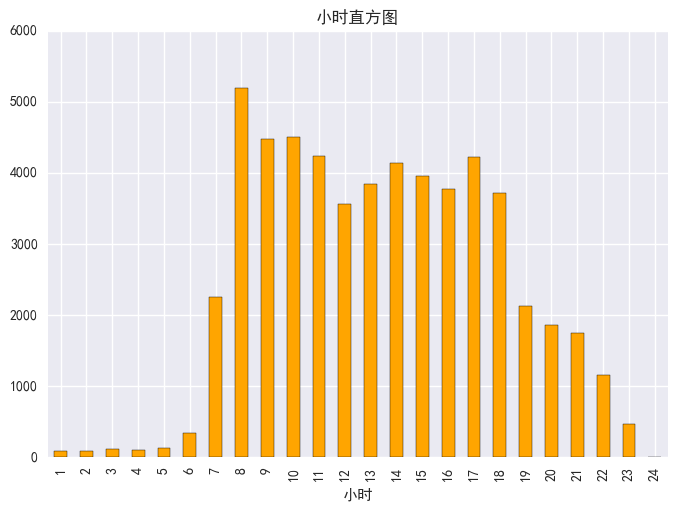

In [10]:
hour_count=accident_hour.value_counts(sort=True).reindex([i for i in range(1,25)])
fig=plt.figure(facecolor='white')
hour_count.plot(kind='Bar',color='orange')
plt.title(u"小时直方图")
plt.xlabel("小时")
plt.show()
fig.savefig("hour_hist.png")

从小时可以看到，晚上出事故概率明显低于白天。而白天中早高峰和晚高峰出事概率最大，尤其是早高峰8点时，达到直方图的最大值

In [13]:
accident_data["accident_month"]=accident_month
accident_data["accident_quarter"]=accident_quarter
# accident_data.accident_weekday_name=accident_time.dt.weekday_name
accident_data["accident_weekday"]=accident_weekday
accident_data["accident_day"]=accident_day
accident_data["accident_hour"]=accident_hour
accident_data["accident_minute"]=accident_minute
print(accident_data.head(1))

          accidenttime accidentaddr             driver1fault  \
0  2015-01-02 04:20:00          白云区  9、不符合前8款规定或者双方同时具有上述情形的   

  driver1responsibility driver2responsibility  sex1 platenumber1 carcolor1  \
0                 负同等责任                 负同等责任     1      贵AU2906         黑   

   sex2 platenumber2       ...            driver1license      driver2license  \
0     1      贵AWZ242       ...        364346519055540274  364557519646476454   

   brith1  brith2 accident_month accident_quarter accident_weekday  \
0  198411  198202              1                1                4   

  accident_day accident_hour accident_minute  
0            2             4              20  

[1 rows x 27 columns]


7     22867
1     16630
8      7612
3      5120
9      2943
4       546
5       369
10      206
2       194
6       164
Name: driver1fault, dtype: int64


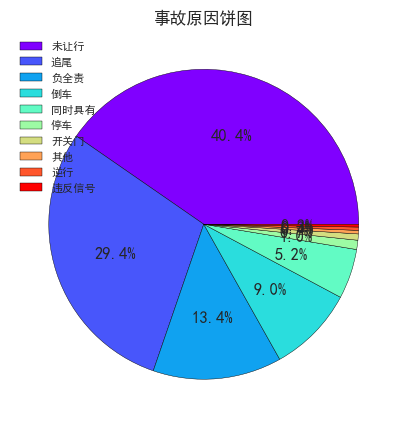

In [20]:
accident_data['driver1fault']=accident_data['driver1fault'].replace(' ','10')
accident_data['driver1fault']=accident_data['driver1fault']\
                                        .replace('1、追尾的','1')
accident_data['driver1fault']=accident_data['driver1fault']\
                                        .replace('2、逆行的','2')
accident_data['driver1fault']=accident_data['driver1fault']\
                                        .replace('3、倒车的','3')
accident_data['driver1fault']=accident_data['driver1fault']\
             .replace('4、停车时未挂低速档、未拉驻车制动，导致车辆滑行的','4')
accident_data['driver1fault']=accident_data['driver1fault']\
                                        .replace('5、开关车门的','5')
accident_data['driver1fault']=accident_data['driver1fault']\
                                        .replace('6、违反交通信号的','6')
accident_data['driver1fault']=accident_data['driver1fault']\
                                        .replace('7、未按规定让行的 ','7')
accident_data['driver1fault']=accident_data['driver1fault']\
                                        .replace('8、依法应负全责的其他情形','8')
accident_data['driver1fault']=accident_data['driver1fault']\
                                        .replace('9、不符合前8款规定或者双方同时具有上述情形的','9')
driverfault=accident_data['driver1fault'].value_counts()
print(driverfault)
fig=plt.figure(facecolor='white',figsize=(5,5))
labels=["未让行","追尾","负全责","倒车","同时具有","停车","开关门","其他",
        "逆行","违反信号"]
driverfault.plot(kind='Pie',autopct='%1.1f%%',colormap='rainbow',labels=None,
                 )
plt.title("事故原因饼图")
plt.legend(labels=labels,loc='upper left',prop={'size':8})
plt.ylabel(' ')
plt.show()
fig.savefig("fault_pie.png")

通过事故饼图可以明显看到大部分事故都是由于未让行和倒车引起的

In [21]:
print("第一负责人负责情况")
print(accident_data["driver1responsibility"].value_counts())
# zhuiwei1=accident_data[accident_data["driver1fault"]=='1']['driver1responsibility']
# print(zhuiwei1.value_counts())
print("第一责任人不负责情况时第二负责人情况：")
print(accident_data[accident_data["driver1responsibility"]=='不负责任']["driver2responsibility"])
print("第二负责人负责情况")
print(accident_data["driver2responsibility"].value_counts())
# zhuiwei2=accident_data[accident_data["driver1fault"]=='1']['driver2responsibility']
# print(zhuiwei2.value_counts())

第一负责人负责情况
负全部责任    53784
负同等责任     2866
不负责任         1
Name: driver1responsibility, dtype: int64
第一责任人不负责情况时第二负责人情况：


4979    负同等责任
Name: driver2responsibility, dtype: object
第二负责人负责情况
不负责任     54347
负同等责任     2304
Name: driver2responsibility, dtype: int64


第一责任绝大部分负权责，第二责任人绝大部分不负责，少部分负同等责任<br>不负责的第一当事人的案例中，第二责任人负同等责任，故为异常数据，进行改正

In [28]:
accident_data.loc[accident_data["driver1responsibility"]=="不负责任","driver1responsibility"]="负同等责任"

In [31]:
equal_responsibility=accident_data[accident_data["driver1responsibility"]=="负同等责任"] [accident_data["driver2responsibility"]=="负同等责任"]
driver1_responsibility=accident_data[accident_data["driver1responsibility"]=="负全部责任"][accident_data["driver2responsibility"]=="不负责任"]
driver2_responsibility=accident_data[accident_data["driver1responsibility"]=="负全部责任"][accident_data["driver2responsibility"]=="负同等责任"]
abnormal_responsibility=accident_data[accident_data["driver1responsibility"]=="负同等责任"][accident_data["driver2responsibility"]=="不负责任"]
print("双方负同等责任数：",equal_responsibility.count()[0])
print("第一责任负全责，第二责任人不负责数：",driver1_responsibility.count()[0])
print("第一责任人负全责，第二责任人负同等责任数：",driver2_responsibility.count()[0])
print("第一责任人负同等责任，第二责任人不负责数：",abnormal_responsibility.count()[0])

双方负同等责任数： 2300
第一责任负全责，第二责任人不负责数： 53780
第一责任人负全责，第二责任人负同等责任数： 4
第一责任人负同等责任，第二责任人不负责数： 567


E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


可以看到，第一责任人负全责占绝大多数

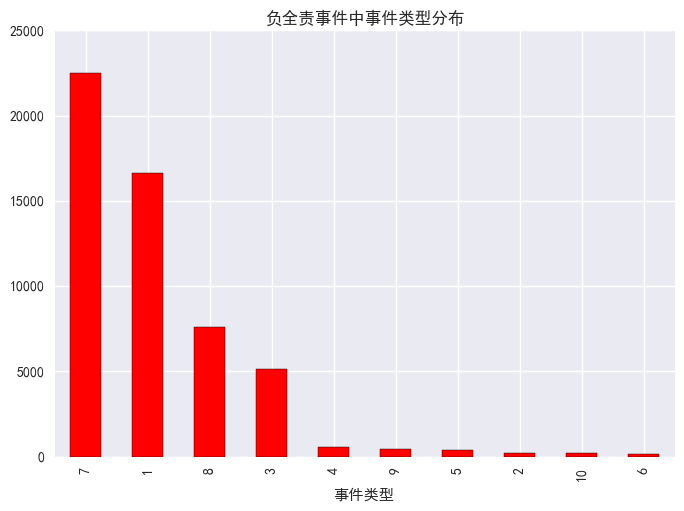

In [37]:
driver1_respon_fault=driver1_responsibility['driver1fault'].value_counts()
equal_respon_fault=equal_responsibility['driver1fault'].value_counts()
fig=plt.figure(facecolor="white")
driver1_respon_fault.plot(kind="Bar",color="red")
plt.xlabel("事件类型")
plt.title(u"负全责事件中事件类型分布")
plt.show()
fig.savefig("fullresponsibility_hist.png")

负全责主要是由未让行和追尾导致的，但这两种事故本身就占事故类型总数的绝大多，所以结果并不意外

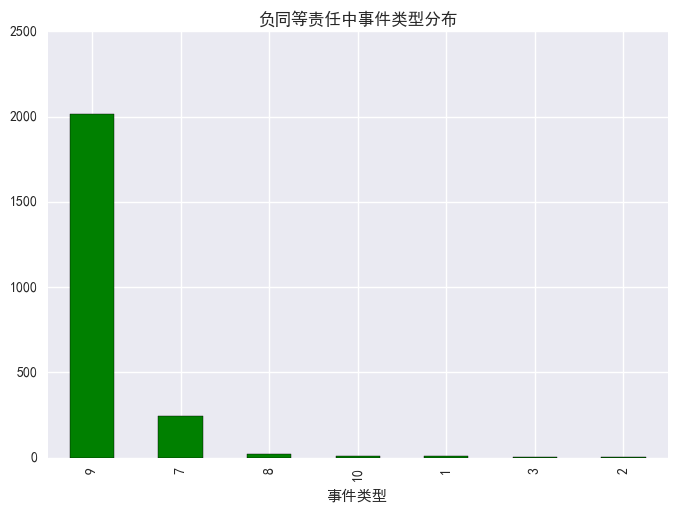

In [38]:
fig=plt.figure(facecolor="white")
equal_respon_fault.plot(kind="Bar",color="green")
plt.title(u"负同等责任中事件类型分布")
plt.xlabel("事件类型")
plt.show()
fig.savefig("equalresponsibility_hist.png")

负同等责任几乎都是有双方都有违规情况导致的，少部分是由未让行导致的

第一责任人性别分布
1    51974
0     4677
Name: sex1, dtype: int64
第二责任人性别分布
1    52126
0     4525
Name: sex2, dtype: int64


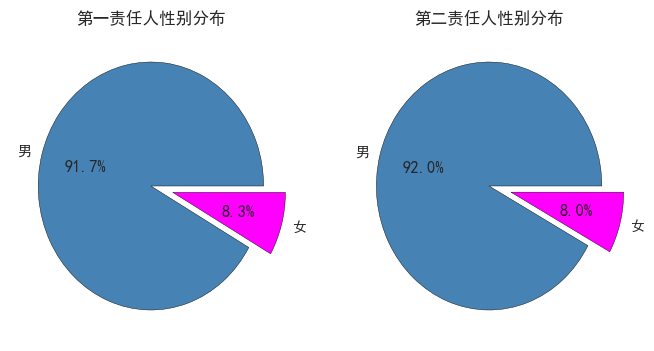

In [40]:
sex1=accident_data["sex1"].value_counts()
sex2=accident_data["sex2"].value_counts()
print("第一责任人性别分布")
print(sex1)
print("第二责任人性别分布")
print(sex2)
fig,axes=plt.subplots(1,2,facecolor="white",figsize=(8,4))
axes[0].set_title(u"第一责任人性别分布")
axes[1].set_title(u"第二责任人性别分布")

axes[0].pie(sex1,labels=["男","女"],autopct='%1.1f%%',colors=["steelblue","magenta"],explode=[0,0.2])
axes[1].pie(sex2,labels=["男","女"],autopct='%1.1f%%',colors=["steelblue","magenta"],explode=[0,0.2])
plt.show()
fig.savefig("sex_pie.png")

可以看到，无论是第一责任还是第二责任人，男性司机更可能出事故。当然，这里并没有考虑到司机本身性别的比列分布，所以结果仅可参考

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


第一责任为男性，第二责任人为男性事件数： 48171
第一责任为男性，第二责任人为女性事件数： 3803
第一责任为女性，第二责任人为男性事件数： 3955
第一责任为女性，第二责任人为女性事件数： 722


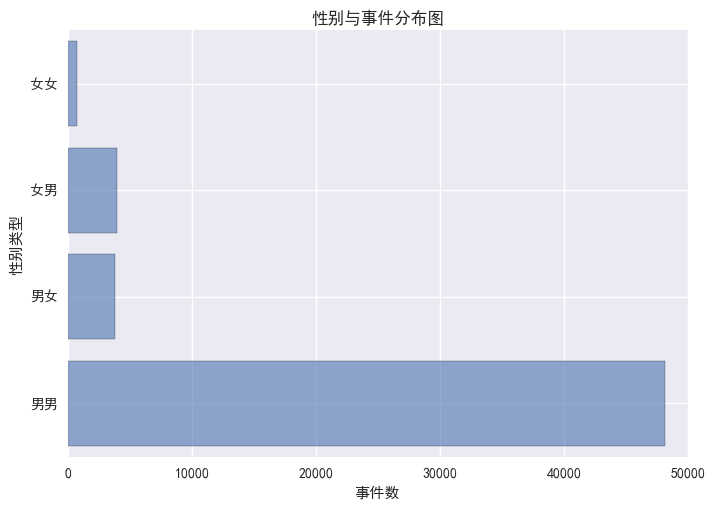

In [41]:
driver11=accident_data[accident_data["sex1"]==1][accident_data["sex2"]==1]#事故当事人都是男性的
print("第一责任为男性，第二责任人为男性事件数：",driver11.count()[0])
driver10=accident_data[accident_data["sex1"]==1][accident_data["sex2"]==0]#事故当事人都是男性的
print("第一责任为男性，第二责任人为女性事件数：",driver10.count()[0])
driver01=accident_data[accident_data["sex1"]==0][accident_data["sex2"]==1]#事故当事人都是男性的
print("第一责任为女性，第二责任人为男性事件数：",driver01.count()[0])
driver00=accident_data[accident_data["sex1"]==0][accident_data["sex2"]==0]#事故当事人都是男性的
print("第一责任为女性，第二责任人为女性事件数：",driver00.count()[0])
fig,ax=plt.subplots(facecolor='white')
ax.barh(range(0,4),[driver11.count()[0],driver10.count()[0],driver01.count()[0],driver00.count()[0]],
        align='center',alpha=0.6)
ax.set_yticks(range(0,4))
ax.set_yticklabels(["男男","男女","女男","女女"])
ax.set_xlabel(u'事件数')
ax.set_ylabel(u'性别类型')
ax.set_title(u'性别与事件分布图')
plt.show()
fig.savefig("sex1_sex2_hist.png")

由于男性司机占大多数，所以绝大多事件都是由男司机与男司机造成的这一现象很容易理解<br>但是图中二三行表示了女司机与男司机发生事故，无论其为第一还是第二责任人，事故数相差不大<br>女司机与司机发生事故的概率远小于与男司机发生的概率，当然这与男司机本身基数大也有关系

In [45]:
pattern=r"贵"
is_province1=accident_data["platenumber1"].str.contains(pattern)
print("True:贵州省，False：其他省")
print("第一责任分车牌归属地分布：")
print(is_province1.value_counts())

is_province2=accident_data["platenumber2"].str.contains(pattern)
print("第二责任分车牌归属地分布：")
print(is_province2.value_counts())

#添加新特征
accident_data["is_province1"]=is_province1
accident_data["is_province2"]=is_province2

True:贵州省，False：其他省
第一责任分车牌归属地分布：
True     52978
False     3673
Name: platenumber1, dtype: int64
第二责任分车牌归属地分布：
True     53514
False     3137
Name: platenumber2, dtype: int64


In [46]:
pattern=r"贵A"
print("第一责任分车牌城市归属地分布：")
is_city1=accident_data["platenumber1"].str.contains(pattern)
print(is_city1.value_counts())
print("第二责任分车牌城市归属地分布：")
is_city2=accident_data["platenumber2"].str.contains(pattern)
print(is_city2.value_counts())
#添加新特征
accident_data["is_city1"]=is_city1
accident_data["is_city2"]=is_city2

第一责任分车牌城市归属地分布：
True     42115
False    14536
Name: platenumber1, dtype: int64
第二责任分车牌城市归属地分布：
True     43515
False    13136
Name: platenumber2, dtype: int64


可以看出，出事车辆绝大部分都是贵州省本省车辆，其中接近1/5车辆为外市车辆第一责任人中不是贵阳市的共有14536名，其中不是贵州省的共有3673名

In [48]:
end_number1=accident_data["platenumber1"].str.get(5)
end_number2=accident_data["platenumber2"].str.get(5)
accident_data["end_number1"]=end_number1
accident_data["end_number2"]=end_number2

贵阳市有车辆限号，所以将尾号也保存,并标记所有是专车车牌的编号

In [57]:
accident_data["is_private1"]=accident_data["is_city1"]
# accident_data.loc[accident_data["end_number1"].str.contains(r"\d")==False&accident_data["is_city1"]==True]=False
# print(accident_data["end_number2"].str.contains(r"\d").value_counts())
privateindex1=accident_data.loc[accident_data["end_number1"].str.contains(r"\d")==False].index
accident_data["is_private1"][privateindex1]=False
accident_data["is_private2"]=accident_data["is_city2"]
privateindex2=accident_data.loc[accident_data["end_number2"].str.contains(r"\d")==False].index
accident_data["is_private2"][privateindex1]=False
print(accident_data[accident_data.is_private1==True].count()[0])
print(accident_data[accident_data.is_private2==True].count()[0])

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


39191
41115


可以看到，绝大数车为专车，需要限行，其中第二责任人是专车的比例更大一些

In [63]:
# print(accident_data["driver1license"].str.extract("(\w\w)").value_counts())
print(accident_data["driver1license"].str.extract("(\w\w)").value_counts()[0:5])
print(accident_data["driver1license"].str.extract("(\w\w\w\w)").value_counts()[0:5])
#print(accident_data["driver2license"])

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
E:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


36    45524
35     4137
07     1398
06      779
77      470
Name: driver1license, dtype: int64
3645    21968
3660     6884
3663     5452
3665     4414
3668     2276
Name: driver1license, dtype: int64


虽然身份证数据已经脱敏了，但由于规则相同，仍能从比例上看出以36开头的为贵州省身份证，3645开头的是贵阳本市身份证

In [90]:
is_driver1_province=accident_data["driver1license"].str.startswith("36")#第一责任人身份证是否为本省
is_driver2_province=accident_data["driver2license"].str.startswith("36")#第二责任人身份证是否为本省
is_driver1_city=accident_data["driver1license"].str.startswith("3645")#第一责任人身份证是否为贵阳市
is_driver2_city=accident_data["driver2license"].str.startswith("3645")#第二责任人身份证是否为贵阳市
accident_data["is_driver1_city"]=is_driver1_city
accident_data["is_driver2_city"]=is_driver2_city
accident_data["is_driver1_province"]=is_driver1_province
accident_data["is_driver2_province"]=is_driver2_province
# fig,ax=plt.subplots(1,2,facecolor="white")
# ax[0].hist(is_driver1_city,is_driver2_city,histtype="bar",stacked=False)
# # ax[0].hist(is_driver2_city,histtype="step",stacked=False)
# #ax[0].bar(is_driver2_province.value_counts().index,is_driver2_province.value_counts(),width=0.25)
# # ax[1].bar(is_driver1_city.value_counts().index,is_driver1_city.value_counts(),width=0.25)
# ax[1].bar(is_driver2_city.value_counts().index,is_driver2_city.value_counts(),width=0.52)
# plt.show()
# fig.savefig("licensc_hist.png")

In [91]:
print(accident_data[accident_data["cclzrq1"]=="-1"]["cclzrq1"].count())
print(accident_data[accident_data["cclzrq2"]=="-1"]["cclzrq2"].count())

11207
13632


第一责任人，第二责任人驾照发放时间没有信息的分别确实11207，13632

In [92]:
driver1_days=accident_data[accident_data["cclzrq1"]!="-1"]["cclzrq1"]
driver2_days=accident_data[accident_data["cclzrq2"]!="-1"]["cclzrq2"]
driver1_days=driver1_days.replace("0001-01-01 00:00:00","2001-01-01 00:00:00")
driver2_days=driver2_days.replace("0001-01-01 00:00:00","2001-01-01 00:00:00")
driver1_days=pd.to_datetime(driver1_days)
driver2_days=pd.to_datetime(driver2_days)
driver1_days=(accident_time-driver1_days).dt.days
driver2_days=(accident_time-driver2_days).dt.days
accident_data["driver1_days"]=driver1_days
accident_data["driver2_days"]=driver2_days

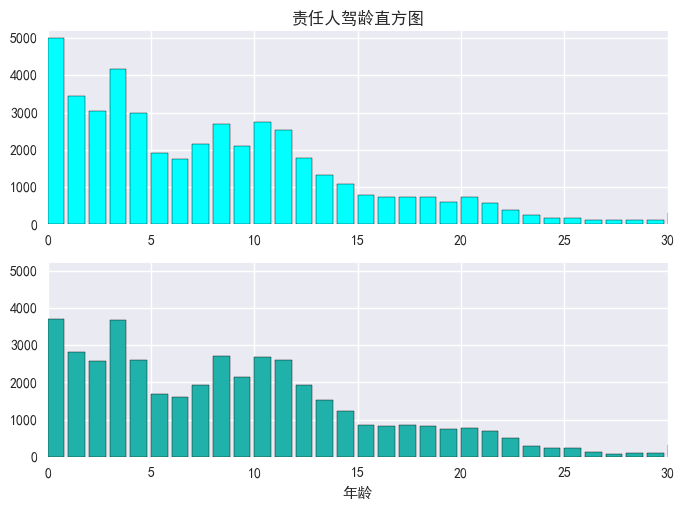

In [96]:
driver1_years=((driver1_days.fillna("-9999").apply(np.int64))/365).apply(np.int64)
driver2_years=((driver2_days.fillna("-9999").apply(np.int64))/365).apply(np.int64)
driver1_years_hist=driver1_years.value_counts()
driver2_years_hist=driver2_years.value_counts()
driver1_years_hist=driver1_years_hist.drop(-27)
driver2_years_hist=driver2_years_hist.drop(-27)
driver1_years_hist=driver1_years_hist.reindex([i for i in range(0,45)])
driver2_years_hist=driver2_years_hist.reindex([i for i in range(0,45)])
driver1_years_hist[30]=driver1_years_hist[30:].sum()
driver2_years_hist[30]=driver2_years_hist[30:].sum()
#print(driver1_years_hist,driver2_years_hist)
#plt.figure(facecolor="white")
fig,axes=plt.subplots(2,1)
axes[0].bar(driver1_years_hist[:31].index,driver1_years_hist[:31],color="cyan")
axes[0].set_xlim(0,30)
axes[0].set_ylim(0,5200)
# axes[0].set_xlabel("年龄")
axes[0].set_title("责任人驾龄直方图")
axes[1].bar(driver2_years_hist[:31].index,driver2_years_hist[:31],color="lightseagreen")
axes[1].set_xlim(0,30)
axes[1].set_ylim(0,5200)
axes[1].set_xlabel("年龄")
#driver1_years_hist[:26].plot(kind="bar",stacked=True)
#driver2_years_hist[:26].plot(kind="bar",stacked=False)
plt.show()
fig.savefig("责任人驾龄直方图")

In [116]:
driver1_years=driver1_years.replace(-27,np.nan)
driver1_years=driver2_years.replace(-27,np.nan)
accident_data["driver1_years"]=driver1_years
accident_data["driver2_years"]=driver2_years

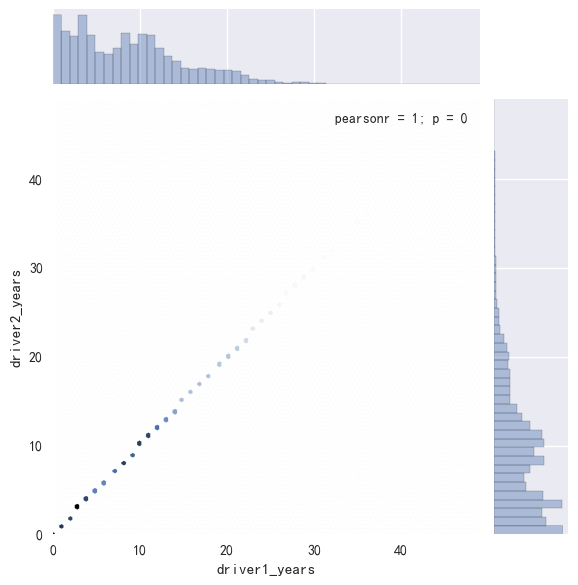

In [119]:
fig=plt.figure()
seaborn.jointplot('driver1_years','driver2_years',data=accident_data,kind="hex")
plt.show()
fig.savefig("driver_union_hist.png")

可以很明显的看到，随着驾龄的增长，事件发生率次数明显降低<br>通过驾龄联合直方图可以看到，责任人双方驾龄分布非常相似

In [120]:
print(accident_data["driver1license"].str.len().value_counts()[1:].sum())
print(accident_data["brith1"].str.len().value_counts().loc[5:].sum())
print(accident_data["driver2license"].str.len().value_counts()[1:].sum())
print(accident_data["brith2"].str.len().value_counts().loc[5:].sum())

1652
83
1922


121


第一，二责任身份证信息分别有1652，1922条数据有误,但是生日信息中不是有效信息只有83，121条，远小于身份证有误的数据数量，所以通过身份证信息填充生日信息中的异常信息是不合理的

In [121]:
driver1_birth=accident_data["brith1"]
driver1_birth[accident_data["brith1"].str.len()!=6]=np.nan
print(driver1_birth.str.len().value_counts())

6.0    56498
Name: brith1, dtype: int64


E:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


查看所有长度为4的数据，没有对出生年份的有效信息，所以将所有长度不为6的数据设为Nan

In [122]:
driver1_birth[driver1_birth.str.startswith(r"19")==False]=np.nan
print(driver1_birth.str.len().value_counts())

6.0    55615
Name: brith1, dtype: int64


E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


即便是6位长度的数据中，仍存在847条错误信息，将其设置为空np.nan

In [123]:
accident_data["brith1"]=driver1_birth
driver1_age=2015-driver1_birth.str.extract(r"(\d\d\d\d)",expand=False).\
                                        fillna("2015").apply(np.int64)
#计算2015年驾驶人年龄，大于70，小于18的数据都是错误数据，全部置为0
driver1_age[driver1_age>70]=0
driver1_age[driver1_age<18]=0
driver1_age_hist=driver1_age.value_counts()
#print(driver1_age_hist)
driver1_age_hist=driver1_age_hist.drop(0)
#print(driver1_age_hist)
driver1_age_hist=driver1_age_hist.reindex([i for i in range(18,71)])
accident_data["driver1_age"]=driver1_age

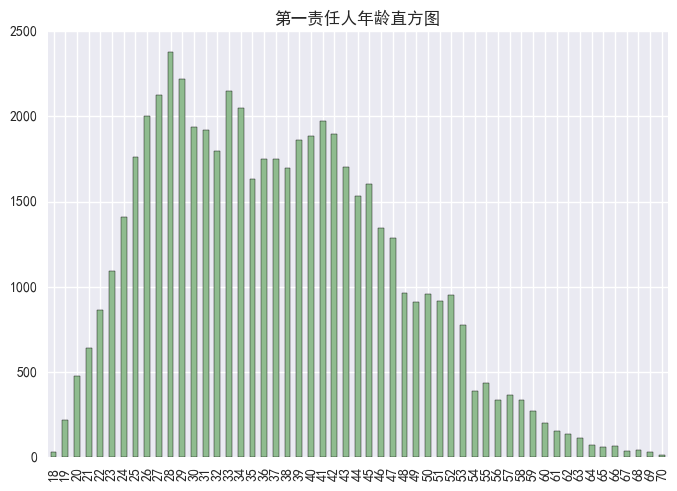

In [124]:
fig=plt.figure(facecolor="white")
plt.title("第一责任人年龄直方图")
driver1_age_hist.plot(kind="bar",color="darkseagreen")
plt.show()
fig.savefig("driver1_age_hist.png")

可以看到事故发生的年龄段主要集中在25岁到30之间

In [128]:
driver2_birth=accident_data["brith2"]
driver2_birth=driver2_birth.str.extract(r"(\d\d\d\d\d\d)",expand=False)
driver2_age=2015-driver2_birth.str.extract(r"(\d\d\d\d)",expand=False).fillna("2015").apply(np.int64)
driver2_age[driver2_age<18]=0
driver2_age[driver2_age>70]=0
driver2_age_hist=driver2_age.value_counts()
#print(driver2_age_hist)
driver2_age_hist=driver2_age_hist.drop(0)
#print(driver2_age_hist)
driver2_age_hist=driver2_age_hist.reindex([i for i in range(18,71)])
# print(driver2_age_hist)
accident_data["driver2_age"]=driver2_age

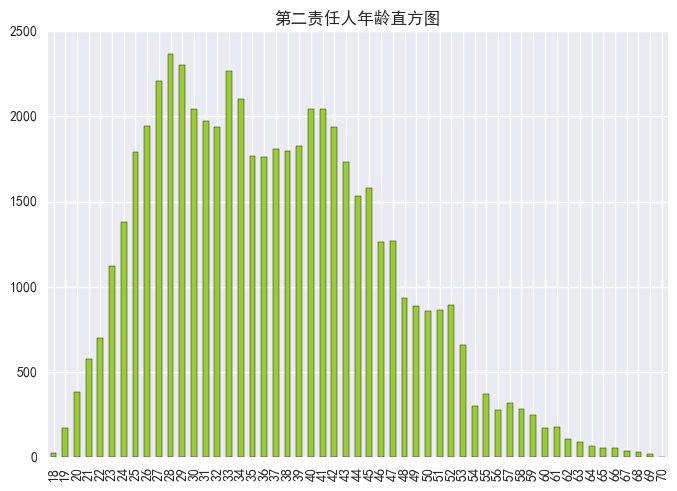

In [129]:
fig=plt.figure(facecolor="white")
plt.title("第二责任人年龄直方图")
driver2_age_hist.plot(kind="bar",color="yellowgreen")
plt.show()
fig.savefig("driver2_age_hist.png")

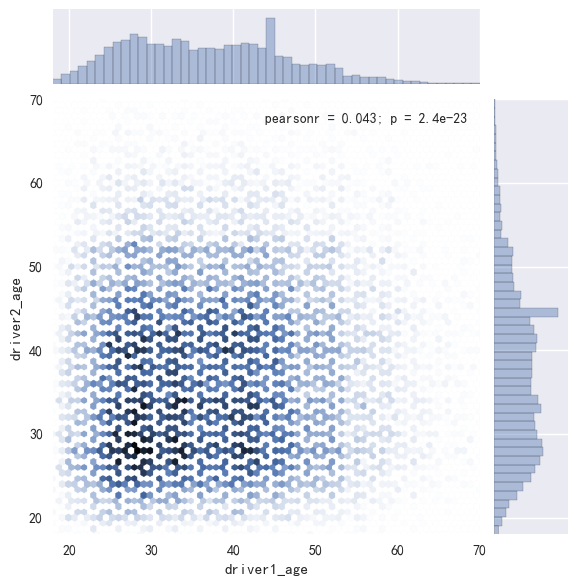

In [132]:
accident_data["driver1_age"]=accident_data["driver1_age"].replace(0,np.nan)
accident_data["driver2_age"]=accident_data["driver2_age"].replace(0,np.nan)
# fig=plt.figure()
seaborn.jointplot('driver1_age','driver2_age',data=accident_data,kind="hex")
plt.show()
# fig.savefig("driver_age_union_hist.png")

可以看到，第二责任人与第一责任的分布非常的吻合。

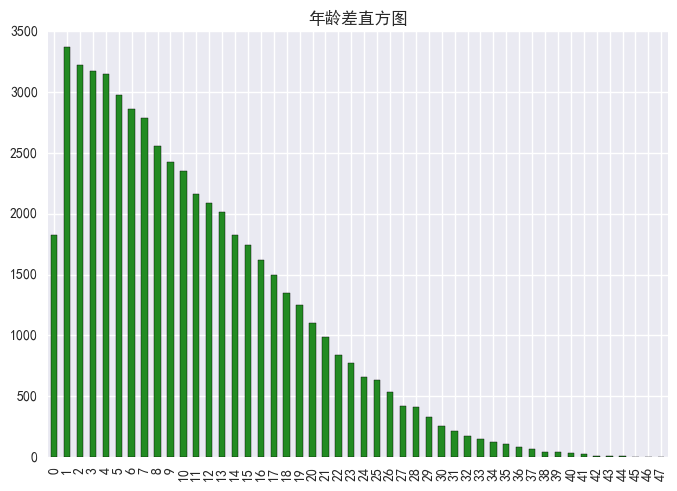

In [140]:
driver1_age=driver1_age.replace(0,np.nan)
driver2_age=driver2_age.replace(0,np.nan)
difference_age=np.fabs(driver1_age-driver2_age)
#error_index=difference_age.index
difference_age_hist=difference_age.value_counts()
difference_age_hist=difference_age_hist.reindex([i for i in range(0,48)])
# print(difference_age_hist)
fig=plt.figure(facecolor="white")
difference_age_hist.plot(kind="bar",color="forestgreen")
plt.title("年龄差直方图")
plt.show()
fig.savefig("difference_age_hist.png")

In [137]:
accident_data["difference_age"]=difference_age

可以看到，随着年龄差距的增大，出现事故概率在减少

In [138]:
#清理车辆颜色信息
color_map={"白色":"白","黑色":"黑","红色":"红","银色":"银","灰色":"灰",
           "黄色":"黄","绿色":"绿","蓝色":"蓝"," 白色":"白","黑 ":"黑",
           "北":"白"," 银":"银","BAI":"白","棕色": '灰'}
carcolor1=accident_data["carcolor1"]
carcolor2=accident_data["carcolor2"]

carcolor1=carcolor1.replace(color_map)
carcolor2=carcolor2.replace(color_map)
other1=carcolor1.value_counts()[8:].index
carcolor1=carcolor1.replace(other1,"其他")

other2=carcolor2.value_counts()[8:].index
carcolor2=carcolor2.replace(other2,"其他") 
# print(carcolor1.value_counts())
# print(carcolor2.value_counts())

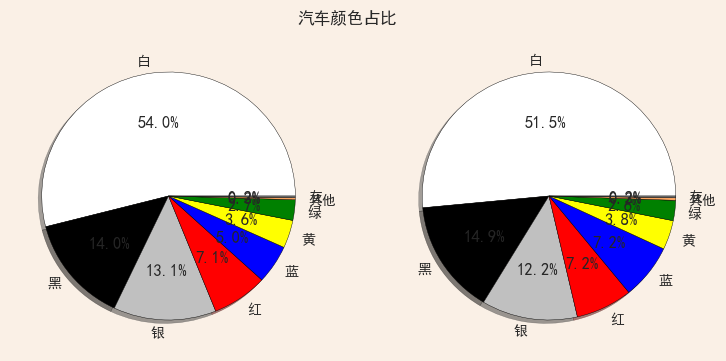

In [143]:
carcolor1_hist=carcolor1.value_counts()
carcolor2_hist=carcolor2.value_counts()
colors=["white","black","silver","red","blue","yellow","green","sandybrown","grey"]
fig,axes=plt.subplots(1,2,facecolor="linen",figsize=(9,4))
axes[0].pie(x=carcolor1_hist,labels=carcolor1_hist.index,
            autopct='%1.1f%%',colors=colors,shadow=True)
# axes[0].set_title("汽车颜色占比")
fig.suptitle("汽车颜色占比")
axes[1].pie(x=carcolor2_hist,labels=carcolor2_hist.index,
            autopct='%1.1f%%',colors=colors,shadow=True)
#axes[1].set_title("第二责任汽车颜色占比")
plt.show()
fig.savefig("car_color_pir.png")

In [180]:
# cp1=list(zip(accident_data["clpp1"].value_counts().index,accident_data["clpp1"].value_counts()))
# cp1=pd.DataFrame(cp1,columns=["cpname","count"])
# # print(cp1.loc[cp1["count"].str.contains("甲壳虫")==True])
cp_map=["大众","丰田","本田","吉利","奥迪","奔驰","宝马","福特","奇瑞","别克","现代","长安","日产",
  "宝骏","哈弗","起亚","雪佛兰","众泰","比亚迪","马自达","标致","路虎","广汽","五菱","保时捷",
  "斯柯达","沃尔沃","江淮","雷克萨斯","凯迪拉克","铃木","荣威","兰博基尼","三菱","绅宝","雪铁龙",
 "启辰","玛莎拉蒂","北京汽车", "捷豹","法拉利","江铃","长城","奔腾","东风","海马","英菲尼迪",
  "福克斯",
  "雅马哈"]
dazhong_map=["宝来","捷达","辉腾","迈腾","速腾","高尔夫",
             "朗逸","凌渡","桑塔纳","途安""辉昂","途观","甲壳虫"]
clcpp1=accident_data["clpp1"]
clcpp2=accident_data["clpp2"]
for cp in cp_map:
    clcpp1.loc[clcpp1.str.contains(cp)==True]=(cp+"牌")
    clcpp2.loc[clcpp2.str.contains(cp)==True]=(cp+"牌")
    
for dz in dazhong_map:
    clcpp1.loc[clcpp1.str.contains(dz)==True]=("大众牌")
    clcpp2.loc[clcpp2.str.contains(dz)==True]=("大众牌")
# clcpp1.loc[clcpp1.str.contains("本田")==True]="本田牌"

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [180]:
accident_data["clcpp1"]=clcpp1
accident_data["clcpp2"]=clcpp2
print(accident_data["clcpp1"].value_counts().count())
print(accident_data["clcpp2"].value_counts().count())

953
941


In [177]:
# print(accident_data["jxmc1"].value_counts()[:200])
jxname1=accident_data["jxmc1"]
jxname1=jxname1.replace("十一培","小河区十一驾校")
jxname1=jxname1.replace("铁二局驾校 ","南明区铁二局驾校")
jxname1=jxname1.replace("消防驾校 ","白云区消防驾校")
print(jxname1.value_counts().count())
jxaddr=accident_data["jxmc1"].str.extract(r"(\w\w)区|(\w+)县|(\w+)州")
print(jxaddr[jxaddr.isnull()==False].count())

484
0    8950
1    1732
2    1978
dtype: int64


E:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [183]:
print(accident_data.head(3))
accident_data.to_csv("accident_data_processed.csv",encoding="utf-8")

          accidenttime accidentaddr driver1fault driver1responsibility  \
0  2015-01-02 04:20:00          白云区            9                 负同等责任   
1  2015-01-05 17:05:00          北二环            1                 负全部责任   
2  2015-01-05 17:30:00        兴关路路口            7                 负全部责任   

  driver2responsibility  sex1 platenumber1 carcolor1  sex2 platenumber2  \
0                 负同等责任     1      贵AU2906         黑     1      贵AWZ242   
1                  不负责任     1      贵A7160F         红     1      贵A3163F   
2                  不负责任     1      贵A31L88        白色     1      贵ANH344   

   ...   is_driver2_province driver1_days driver2_days driver1_years  \
0  ...                  True          NaN          NaN           NaN   
1  ...                  True       1995.0       1414.0           3.0   
2  ...                  True       2728.0       1011.0           2.0   

  driver2_years driver1_age driver2_age difference_age clcpp1 clcpp2  
0           -27        31.0        33.0   